In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn import metrics
from sklearn.model_selection import cross_val_predict
import seaborn as sb
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.ensemble import RandomForestClassifier

#import graphviz




In [42]:
!pip install category_encoders

You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.8/bin/python3 -m pip install --upgrade pip' command.


In [43]:
import category_encoders as ce

In [44]:
df2013 =pd.read_spss('defunciones/2013-defunciones.sav')
df2014 =pd.read_spss('defunciones/2014-defunciones.sav')
df2015 =pd.read_spss('defunciones/2015-defunciones.sav')
df2016 =pd.read_spss('defunciones/2016-defunciones.sav')
df2017 =pd.read_spss('defunciones/2017-defunciones.sav')
df2018 =pd.read_spss('defunciones/2018-defunciones.sav')
df2019 =pd.read_spss('defunciones/2019-defunciones.sav')
df2020 =pd.read_spss('defunciones/2020-defunciones.sav')

df = df2013.append([df2014, df2015, df2016, 
                    df2017, df2018, df2019, 
                    df2020, ])


In [45]:
#selección de variables
df = df[['Depocu', 'Mesocu', 'Edadif', 'Ecidif', 'Escodif', 'Asist', 'Ocur', 'Ciuodif']]
print(df.columns.values)

['Depocu' 'Mesocu' 'Edadif' 'Ecidif' 'Escodif' 'Asist' 'Ocur' 'Ciuodif']


In [46]:
df.drop(df[df['Edadif'] == 'Ignorado'].index, inplace = True)

df.drop(df[df['Edadif'] < 15].index, inplace = True)

df.drop(df[df['Escodif'] == 'Ignorado'].index, inplace = True)
df.drop(df[df['Asist'] == 'Ignorado'].index, inplace = True)
df.drop(df[df['Ciuodif'] == 'Ignorado'].index, inplace = True)

pd.to_numeric(df['Edadif'])

print(df.columns.values)

['Depocu' 'Mesocu' 'Edadif' 'Ecidif' 'Escodif' 'Asist' 'Ocur' 'Ciuodif']


In [47]:
encoder = ce.OneHotEncoder(use_cat_names=True)

In [48]:
X = df[['Depocu', 'Mesocu', 'Ecidif', 'Escodif', 'Asist', 'Ocur', 'Ciuodif']]
y = df.pop('Edadif')
y=y.astype('int')



In [49]:
print(y)

9536      36
9538      16
9539      29
9542      65
9543      41
        ... 
95654    107
95655    107
95656    107
95657    107
95658    108
Name: Edadif, Length: 115728, dtype: int64


In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, train_size=0.7,  random_state=42)

In [51]:
X_train.head()

,Depocu,Mesocu,Ecidif,Escodif,Asist,Ocur,Ciuodif
41608,Alta Verapaz,Julio,Soltero(a),Ninguna,Médica,Hospital público,No especificado en otro grupo
90290,Jutiapa,Junio,Casado(a),Ninguna,Médica,Domicilio,"Peones agropecuarios, pesqueros y forestales"
28214,Guatemala,Enero,Casado(a),Ninguna,Médica,Hospital público,No especificado en otro grupo
25792,Guatemala,Junio,Soltero,Primaria,Médica,Hospital público,Conductores de vehículos y operadores de equip...
37531,Guatemala,Diciembre,Casado(a),Primaria,Médica,Hospital privado,"Peones agropecuarios, pesqueros y forestales"


In [52]:
X_train2 = encoder.fit_transform(X_train)

In [53]:
X_test2 = encoder.transform(X_test)

In [54]:
X_train2.head()

,Depocu_Alta Verapaz,Depocu_Jutiapa,Depocu_Guatemala,Depocu_Chiquimula,Depocu_Jalapa,Depocu_Quetzaltenango,Depocu_Baja Verapaz,Depocu_Suchitepequez,Depocu_Zacapa,Depocu_Escuintla,...,Ciuodif_Empleados en trato directo con el público,Ciuodif_Trabajadores de los cuidados personales,Ciuodif_Vendedores ambulantes de servicios y afines,"Ciuodif_Trabajadores forestales calificados, pescadores y cazadores",Ciuodif_Ensambladores,Ciuodif_Profesionales de tecnología de la información y las comunicaciones,Ciuodif_Oficiales de las fuerzas armadas,"Ciuodif_Gerentes de hoteles, restaurantes, comercios y otros servicios",Ciuodif_Ayudantes de preparación de alimentos,Ciuodif_Directores y gerentes de producción y operaciones
41608,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
90290,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
28214,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
25792,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
37531,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [55]:
#tree depth

train_accuracy = []
test_accuracy = []

for depth in range(1, 10):
            dt = tree.DecisionTreeRegressor(max_depth=depth, random_state=10)
            dt.fit(X_train2, y_train)
            
            train_accuracy.append(dt.score(X_train2, y_train))
            test_accuracy.append(dt.score(X_test2, y_test))
            
frame = pd.DataFrame({'max_depth':range(1, 10), 'train_acc':train_accuracy, 'test_acc':test_accuracy})
print(frame.head())

   max_depth  train_acc  test_acc
0          1   0.113224  0.116994
1          2   0.173016  0.176524
2          3   0.223055  0.222914
3          4   0.251283  0.250207
4          5   0.269024  0.265980


No handles with labels found to put in legend.


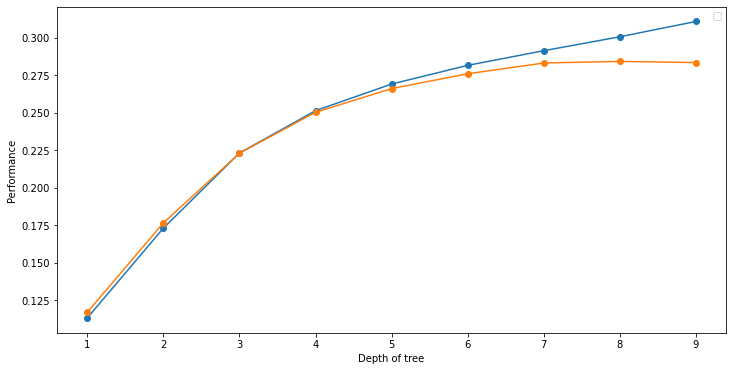

In [56]:
plt.figure(figsize=(12, 6))
plt.plot(frame['max_depth'], frame['train_acc'], marker='o')
plt.plot(frame['max_depth'], frame['test_acc'], marker='o')
plt.xlabel('Depth of tree')
plt.ylabel('Performance')
plt.legend()
plt.show()

In [57]:
from sklearn.tree import DecisionTreeRegressor

In [58]:
rt = DecisionTreeRegressor(max_depth=5, random_state=10)

In [59]:
rt.fit(X_train2, y_train)

DecisionTreeRegressor(max_depth=5, random_state=10)

In [60]:
column_names = ['Depocu', 'Mesocu', 'Ecidif', 'Escodif', 'Asist', 'Ocur', 'Ciuodif']

In [61]:
tree.export_graphviz(rt, out_file='regression_tree.dot', class_names=True, max_depth=3)

In [62]:
!dot -Tpng regression_tree.dot -o tree.png

In [63]:
y_pred_rt = rt.predict(X_test2)

In [64]:
y_pred_rt[:5]

array([78.63070888, 62.49068142, 73.90136471, 56.90864702, 73.90136471])

In [65]:
#metricas

from sklearn.metrics import mean_absolute_error, r2_score

In [66]:
meanAbs = mean_absolute_error(y_test, y_pred_rt)
meanAbs


14.844117818814977

In [67]:
r2 = r2_score(y_test, y_pred_rt)
r2

0.26598038488977915

In [68]:
#random forest
from sklearn.ensemble import RandomForestClassifier

In [69]:
#random forest
rf = RandomForestClassifier(max_depth=5, random_state=10)


In [70]:
rf.fit(X_train2, y_train)

RandomForestClassifier(max_depth=5, random_state=10)

In [71]:
y_pred = rf.predict(X_test2)


In [72]:
print ("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print ("Precision:", metrics.precision_score(y_test,y_pred,average="weighted", zero_division=1) )
print ("Recall: ", metrics.recall_score(y_test,y_pred,average="weighted", zero_division=1))

Accuracy: 0.03534087963363
Precision: 0.19035062115576887
Recall:  0.03534087963363
